In [9]:
%reset -f

import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

from scipy.stats import randint
from scipy.stats import norm

import pandas as pd

np.random.seed(seed=5)

In [11]:
Y = []
X = []

beta_0 = []
beta_1 = []
group  = []

for i in range(1,120):
    
    ind = randint.rvs(0,3)
    b0  = ind * 6 + 5
    b1  = ind * 6 + 5

    income = norm.rvs(loc=5, scale=5, size=1)[0]
    random = norm.rvs(loc=0, scale=5, size=1)[0]

    consumption = b0 + b1 * income + random
    
    Y.append(consumption)
    X.append(income)
    beta_0.append(b0)
    beta_1.append(b1)
    group.append(ind)
    
d = {'Y' : pd.Series(Y),
     'X' : pd.Series(X),
     'group' : pd.Series(group)
    }
 
df = pd.DataFrame(d)

In [12]:
df

,Y,X,group
0,161.016172,8.131866,2
1,128.885544,6.730417,2
2,138.450277,11.702335,1
3,-5.591030,-0.877242,2
4,91.254262,6.722855,1
...,...,...,...
114,9.019188,3.549528,0
115,48.822181,1.337732,2
116,51.489679,2.300698,2
117,-19.827128,-2.036755,1


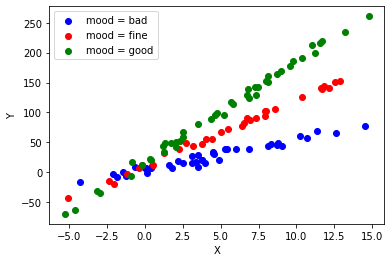

In [14]:
fig = plt.figure()

plt.scatter(df['X'][df['group'] == 0], df['Y'][df['group'] == 0], color='blue', label='mood = bad')
plt.scatter(df['X'][df['group'] == 1], df['Y'][df['group'] == 1], color='red', label='mood = fine')
plt.scatter(df['X'][df['group'] == 2], df['Y'][df['group'] == 2], color='green', label='mood = good')

plt.xlabel('X')
plt.ylabel('Y')

plt.legend()

plt.show()

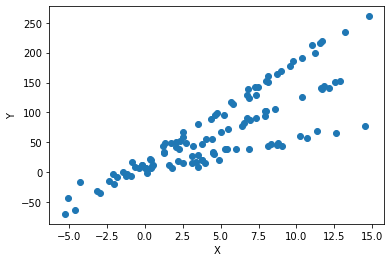

In [16]:
fig = plt.figure()

plt.scatter(df['X'], df['Y'])

plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [17]:
import statsmodels.api   as sm

X_one = df[['X']]
X_one = sm.add_constant(X_one)
Y_one = df[['Y']]

reg1 = sm.OLS(Y_one, X_one)

result1 = reg1.fit()
print(result1.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     279.6
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           8.41e-33
Time:                        02:16:05   Log-Likelihood:                -596.07
No. Observations:                 119   AIC:                             1196.
Df Residuals:                     117   BIC:                             1202.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3647      4.781      1.750      0.0

In [18]:
df['Yhat'] = result1.predict()

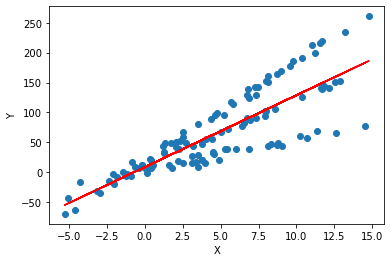

In [19]:
fig = plt.figure()

plt.scatter(df['X'],df['Y'])
plt.plot(df['X'], df['Yhat'], color = 'red')

plt.xlabel('X')
plt.ylabel('Y')

plt.show()